In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *

from src.plotter import *
from src.filters import *
import math
import pickle
import scipy
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import cm
from scipy import signal
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tdt 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, hilbert, welch
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
from scipy.io import savemat
from src.phase_decoder_support import *
from src.neural_analysis import *
from src.wiener_filter import *
from src.folder_handler import *
from src.tdt_support import *
from src.decoders import *


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
rollie1129 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1129')
rollie1129.process()

read from t=0s to t=371.88s
read from t=0s to t=352.3s


(array([[ 20.,  80.,  20., ...,  40.,  20.,  20.],
        [ 20.,  40.,   0., ...,  20.,  20.,  60.],
        [  0.,  40.,  40., ..., 140.,  20.,  40.],
        ...,
        [ 20.,   0.,   0., ...,  20.,  20.,   0.],
        [ 40.,  40.,   0., ...,  20.,  40.,  80.],
        [  0.,  40.,   0., ...,  20.,   0.,   0.]]),
 array([[167.48464387,  63.85915525,  85.57627118, ...,  61.62516639,
          82.02233546, 160.45151816],
        [162.68903079,  67.16539274,  79.07084519, ...,  59.99230052,
          76.71208209, 165.0244428 ],
        [163.31619854,  55.54741612,  84.60433203, ...,  64.38591679,
          82.54450781, 163.78877682],
        ...,
        [147.91989055,  54.29923447, 103.29290928, ...,  74.90590892,
          96.67447058, 159.89321414],
        [144.20502153,  54.43811062, 104.45613898, ...,  75.77255941,
          98.28704118, 158.96151146],
        [142.76760199,  54.96163038, 106.93983068, ...,  76.36840837,
         106.24960909, 164.28462118]]))

In [3]:
h_sin, h_cos, r2, predicted_arctans, test_arctans, test_rates, phase_list = rollie1129.decode_phase(metric_angle="knee")

In [4]:
# rollie1209 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1209')
# rollie1209.process()

In [5]:
# _, _, _, _, _, _ = rollie1209.decode_phase()

In [6]:
# rollie1216 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1216')
# rollie1216.process()

In [7]:
# _, _, _, _, _, _ = rollie1216.decode_phase()

In [8]:
# rollie1220 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1220')
# rollie1220.process()

In [9]:
# _, _, _, _, _, _ = rollie1220.decode_phase()

In [10]:
# morbo1101 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/morbo1101')
# morbo1101.process()

In [11]:
# _, _, _, _, _, _ = morbo1101.decode_phase()

In [12]:
# morbo1101.impulse_response(AOI = 1, H = 'sin')

In [13]:
# _, _ = morbo1101.DOM(angle_name = 'limbfoot')
# _, _ = morbo1101.DOM(angle_name = 'knee')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
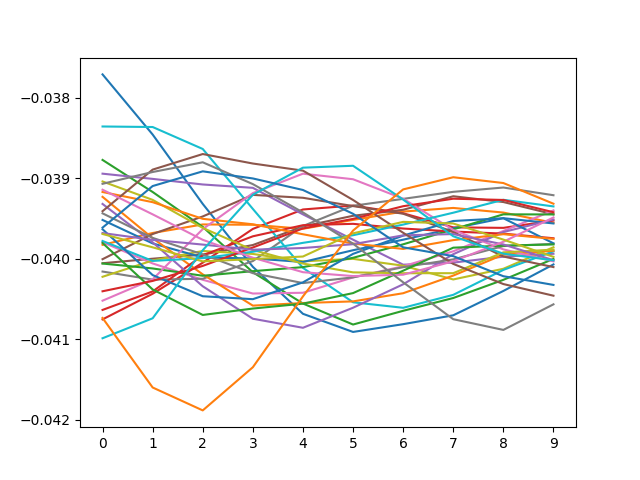

In [14]:
_ = rollie1129.impulse_response(AOI = 1, H = 'sin')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
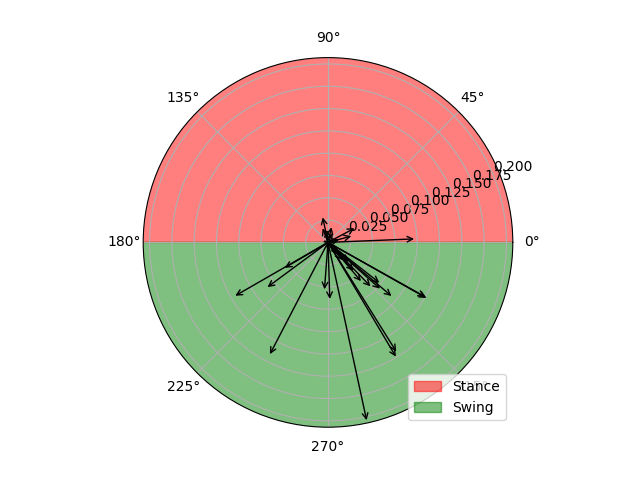

In [15]:
_, _ = rollie1129.DOM(angle_name = 'knee')
# _, _ = rollie1209.DOM(angle_name = 'knee')
# _, _ = rollie1216.DOM(angle_name = 'knee')
# _, _ = rollie1220.DOM(angle_name = 'knee')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
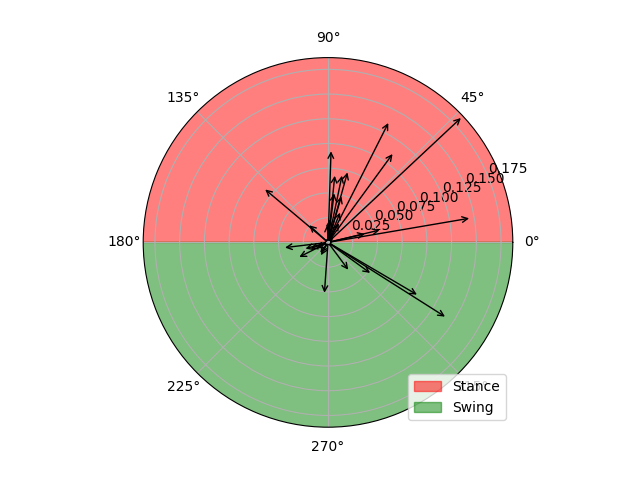

In [16]:
_, _ = rollie1129.DOM(angle_name = 'limbfoot')
# _, _ = rollie1209.DOM(angle_name = 'limbfoot')
# _, _ = rollie1216.DOM(angle_name = 'limbfoot')
# _, _ = rollie1220.DOM(angle_name = 'limbfoot')

In [80]:
print(rollie1129.data['angle_names'])
print(rollie1129.data['bodyparts'])
print(r2)

['foot', 'knee', 'hip', 'limbfoot', 'hand', 'elbow', 'shoulder', 'forelimb']
['toe', 'MTP', 'ankle', 'knee', 'pelvis bottom', 'hip', 'pelvis top', 'finger', 'knuckle', 'wrist', 'elbow', 'shoulder', 'scapula', 'x1', 'x2', 'y1', 'y2']
[0.23159571 0.4905207  0.3175701  0.35140312 0.27808686 0.33737857
 0.2416477  0.37491489]


In [81]:
wrist_y = rollie1129.marker_position('wrist', 1)
scapula_y = rollie1129.marker_position('scapula', 1)
relative_y = wrist_y - scapula_y
y_min = np.min(relative_y)
rel_y = relative_y - y_min
wrist_x = rollie1129.marker_position('wrist', 0)
shoulder_x = rollie1129.marker_position('shoulder', 0)
relative_x = shoulder_x - wrist_x
min_x = np.min(relative_x)
rel_x = relative_x - min_x
tsf = np.linspace(0, (phase_list.shape[0]*50)/1000,phase_list.shape[0])

In [82]:
print(relative_x)
print(rel_x)

[-53.5606315  -32.69419442 -17.95163977 ... -29.28437329 -26.69257035
 -25.68541596]
[25.80977327 46.67621035 61.418765   ... 50.08603149 52.67783442
 53.68498881]


In [145]:
dy = np.diff(rel_y)
dx = np.diff(rel_x)
dt = tsf[1]-tsf[0]
dydt = dy/dt
dxdt = dx/dt
ddy = np.diff(rel_y, 2)
ddx = np.diff(rel_x, 2)
ddyddt = ddy/(dt**2)
ddxddt = ddx/(dt**2)
dddy = np.diff(rel_y, 3)
dddydddt = dddy/(dt**3)
dddx = np.diff(rel_x, 3)
dddxdddt = dddx/(dt**3)
_, kin = rollie1129.stitch_and_format()
fore_angle = kin[:, 7]
dtheta = np.diff(fore_angle)
dthetadt = dtheta/dt
ddtheta = np.diff(fore_angle, 2)
ddthetaddt = ddtheta/(dt**2)
dddtheta = np.diff(fore_angle, 3)
dddthetadddt = dddtheta/(dt**3)

dddthetadddt = np.append(dddthetadddt, [-0.001, -0.001, -0.001])
ddthetaddt = np.append(ddthetaddt, [-0.001, -0.001])
dthetadt = np.append(dthetadt, [-0.001])

dddxdddt = np.append(dddxdddt, [-0.001, -0.001, -0.001])
ddxddt = np.append(ddxddt, [-0.001, -0.001])
dxdt = np.append(dxdt, [-0.001])

In [146]:
peaks_theta, _ = spicy.signal.find_peaks(fore_angle, wlen= 60, prominence = 9, distance = 5)    
peaks_dthetadt_plus, _ = spicy.signal.find_peaks(dthetadt, prominence=3, distance= 10)    
peaks_dthetadt_minus, _ = spicy.signal.find_peaks(-(dthetadt), prominence=3, distance= 10)    
peaks_ddthetaddt_plus, _ = spicy.signal.find_peaks(ddthetaddt, prominence=3, distance= 10)    
peaks_ddthetaddt_minus, _ = spicy.signal.find_peaks(-(ddthetaddt), prominence=3, distance= 10)    
peaks_dddthetadddt_minus, _ = spicy.signal.find_peaks(-(dddthetadddt), prominence=3, distance= 10)    


peaks_relx, _ = spicy.signal.find_peaks(rel_x, wlen= 60, prominence = 9, distance = 5)
peaks_dxdt_plus, _ = spicy.signal.find_peaks(dxdt, prominence=3, distance= 10)    
peaks_dxdt_plus, _ = spicy.signal.find_peaks(dxdt, prominence=3, distance= 10)    
peaks_dxdt_minus, _ = spicy.signal.find_peaks(-(dxdt), prominence=3, distance= 10)    
peaks_ddxddt_plus, _ = spicy.signal.find_peaks(ddxddt, prominence=3, distance= 10)    
peaks_ddxddt_minus, _ = spicy.signal.find_peaks(-(ddxddt), prominence=3, distance= 10)    
peaks_dddxdddt_minus, _ = spicy.signal.find_peaks(-(dddxdddt), prominence=3, distance= 10)       

In [205]:
bdtdt = np.zeros((dthetadt.shape[0]))
for i in range(len(dthetadt)):
    if (dthetadt[i]) >= np.max(dthetadt)*0.05:
        bdtdt[i] = 1
for i in range(1,len(bdtdt)-1,1):
    if (bdtdt[i]) == 1:
        if (bdtdt[i+1] != 1) and (bdtdt[i-1] != 1):
            bdtdt[i] = 0
raw_copy = bdtdt.copy()
for i in range(5,len(bdtdt)+1,1):
    a = i
    b = -a
    if (bdtdt[b] == 1) and (bdtdt[b+1] == 0):
        conditions = [(len(bdtdt)-i-1), (len(bdtdt)-i), (len(bdtdt)-i+1),(len(bdtdt)-i+2),(len(bdtdt)-i+3)]
        if any(val in peaks_theta for val in conditions):
            continue
        else:
            bdtdt[b] = 0 
    
            
# bddtddt = np.zeros((ddthetaddt.shape[0]))
# for i in range(len(ddthetaddt)):
#     if (ddthetaddt[i]) >= 0:
#         bddtddt[i] = 1
# for i in range(1,len(bddtddt)-1,1):
#     if (bddtddt[i]) == 1:
#         if (bddtddt[i+1] != 1) and (bddtddt[i-1] != 1):
#             bddtddt[i] = 0
            
            
            
bdxdt = np.zeros((dxdt.shape[0]))
for i in range(len(bdxdt)):
    if (dxdt[i]) >= np.max(dxdt)*0.05:
        bdxdt[i] = 1
for i in range(1,len(bdxdt)-1,1):
    if (bdxdt[i]) == 1:
        if (bdxdt[i+1] != 1) and (bdxdt[i-1] != 1):
            bdxdt[i] = 0
for i in range(5,len(bdxdt)+1,1):
    b = -i
    if (bdxdt[b] == 1) and (bdxdt[b+1] == 0):
        conditions = [(len(bdxdt)-i-1), (len(bdxdt)-i), (len(bdxdt)-i+1), (len(bdxdt)-i+2), (len(bdxdt)-i+3)]
        if any(val in peaks_relx for val in conditions):
            continue
        else:
            bdxdt[b] = 0 


Text(0.5, 1.0, 'reconstructed phase')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
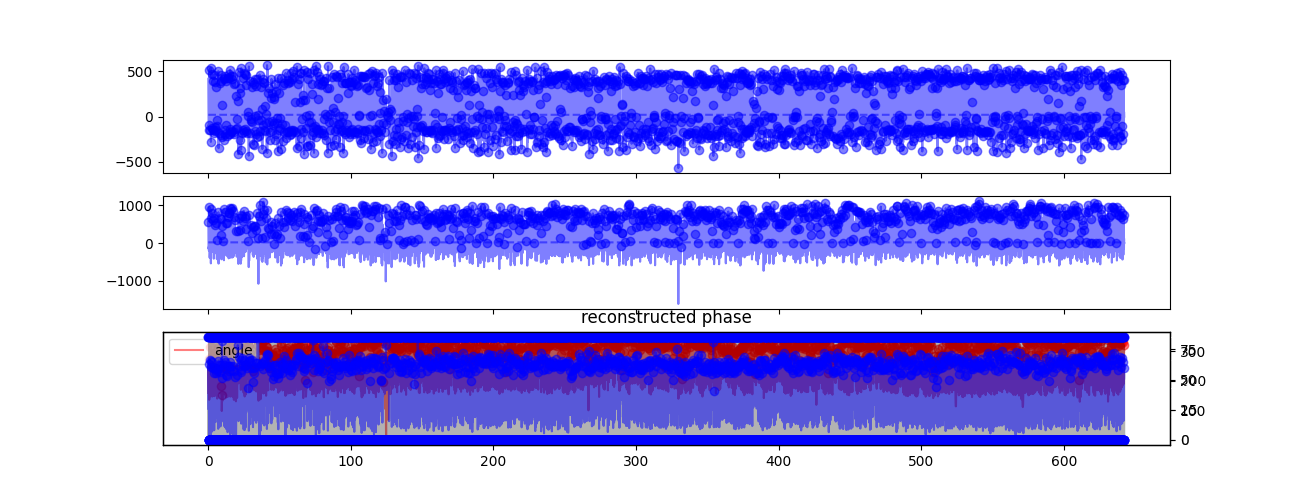

In [206]:
fig4, (ax00, ax22, ax1) = plt.subplots(3, 1, figsize=(13,5),sharex = True)
 
# ax00 = ax0.twinx()    
# ax000 = ax0.twinx()    
# ax0000 = ax0.twinx()    
# ax00000 = ax0.twinx()    
# ax000.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
# ax0.plot(tsf, rel_x, c = 'r', alpha = 0.5, label= 'position')
ax00.plot(tsf, dxdt, c = 'b', alpha = 0.5, label = 'velocity')
# ax0000.plot(tsf, ddxddt, c = 'purple', alpha = 0.5, label = 'acceleration')
# ax00000.plot(tsf, dddxdddt, c = 'green', alpha = 0.5, label = 'jerk')
# ax0.legend(loc='upper left')
ax00.plot(tsf, np.zeros(dxdt.shape[0])+20, c = 'b', alpha = 0.5, linestyle = '--')
# ax0000.plot(tsf, np.zeros(ddxddt.shape[0]), c = 'purple', alpha = 0.5, linestyle = '--')
# ax00000.plot(tsf, np.zeros(dddxdddt.shape[0]), c = 'green', linestyle = '--', alpha = 0.5)
ax00.scatter(tsf[peaks_dxdt_plus], dxdt[peaks_dxdt_plus], c = 'b', alpha = 0.5)
ax00.scatter(tsf[peaks_dxdt_minus], dxdt[peaks_dxdt_minus], c = 'b', alpha = 0.5)
# ax0000.scatter(tsf[peaks_ddxddt_plus], ddxddt[peaks_ddxddt_plus], c = 'purple', alpha = 0.5)
# ax0000.scatter(tsf[peaks_ddxddt_minus], ddxddt[peaks_ddxddt_minus], c = 'purple', alpha = 0.5)
# ax00000.scatter(tsf[peaks_dddxdddt_minus], dddxdddt[peaks_dddxdddt_minus], c = 'green', alpha = 0.5)
# ax00.legend(loc='upper right')
# ax0000.legend(loc='lower right')
# ax00000.legend(loc='lower left')
# ax0.tick_params(axis='y', colors='white')
# ax00.tick_params(axis='y', colors='white')
# ax0000.tick_params(axis='y', colors='white')
# ax00000.tick_params(axis='y', colors='white')
# ax0.set_title("relative x positon, its derivtives, and angle peak derived phase")

# ax22 = ax2.twinx()    
# ax222 = ax2.twinx()    
# ax2222 = ax2.twinx()    
# ax22222 = ax2.twinx()    
# ax222.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
# ax2.plot(tsf, fore_angle, c = 'r', alpha = 0.5, label= 'position')
ax22.plot(tsf, dthetadt, c = 'b', alpha = 0.5, label = 'velocity')
ax22.scatter(tsf[peaks_dthetadt_plus], dthetadt[peaks_dthetadt_plus], c = 'b', alpha = 0.5)
# ax22.scatter(tsf[peaks_dthetadt_minus], dthetadt[peaks_dthetadt_minus], c = 'b', alpha = 0.5)
ax22.plot(tsf, np.zeros(dthetadt.shape[0])+20, c = 'b', alpha = 0.5, linestyle = '--')
# ax2222.plot(tsf, ddthetaddt, c = 'purple', alpha = 0.5, label = 'acceleration')
# ax2222.scatter(tsf[peaks_ddthetaddt_plus], ddthetaddt[peaks_ddthetaddt_plus], c = 'purple', alpha = 0.5)
# ax2222.scatter(tsf[peaks_ddthetaddt_minus], ddthetaddt[peaks_ddthetaddt_minus], c = 'purple', alpha = 0.5)
# ax2222.plot(tsf, np.zeros(ddthetaddt.shape[0]), c = 'purple', alpha = 0.5, linestyle = '--')
# ax22222.plot(tsf, dddthetadddt, c = 'green', alpha = 0.5, label = 'jerk')
# ax22222.scatter(tsf[peaks_dddthetadddt_minus], dddthetadddt[peaks_dddthetadddt_minus], c = 'green', alpha = 0.5)
# ax22222.plot(tsf, np.zeros(dddthetadddt.shape[0]), c = 'green', linestyle = '--', alpha = 0.5)
# ax2.legend(loc='upper left')
# ax22.legend(loc='upper right')
# ax2222.legend(loc='lower right')
# ax22222.legend(loc='lower left')
# ax2.tick_params(axis='y', colors='white')
# ax22.tick_params(axis='y', colors='white')
# ax2222.tick_params(axis='y', colors='white')
# ax22222.tick_params(axis='y', colors='white')
# ax2.set_title("forelimb angle, its derivtives, and angle peak derived phase")


ax11 = ax1.twinx()    
ax111 = ax1.twinx()    
ax1111 = ax1.twinx()    
ax11111 = ax1.twinx()    
ax111.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
ax1.plot(tsf, fore_angle, c = 'r', alpha = 0.5, label= 'angle')
ax1.scatter(tsf[peaks_theta], fore_angle[peaks_theta], c = 'r', alpha = 0.5)
ax11111.plot(tsf, rel_x, c = 'blue', alpha = 0.5, label= 'x_position')
ax11111.scatter(tsf[peaks_relx], rel_x[peaks_relx], c = 'blue', alpha = 0.5)
# ax1111.scatter(tsf, meandt, c = 'purple', alpha = 0.5)
ax1111.scatter(tsf, bdxdt, c = 'blue', alpha = 0.5)
# ax1111.scatter(tsf, bdtdt, c = 'red', alpha = 0.5)

ax1.legend(loc='upper left')
ax1.tick_params(axis='y', colors='white')
ax11.tick_params(axis='y', colors='white')
ax1111.tick_params(axis='y', colors='white')
ax1.set_title("reconstructed phase")

In [207]:
print(peaks_theta)

[    3    18    34 ... 12821 12833 12842]


In [185]:
i = 10
conditions = [(len(bdtdt)-i-1), (len(bdtdt)-i), (len(bdtdt)-i+1),(len(bdtdt)-i+2),(len(bdtdt)-i+2),(len(bdtdt)-i+4)]
print(conditions)
for condition in conditions:
    if condition in peaks_theta:
          print('true')

[12837, 12838, 12839, 12840, 12840, 12842]
true


Text(0.5, 1.0, 'forelimb angle, its derivtives, and angle peak derived phase')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
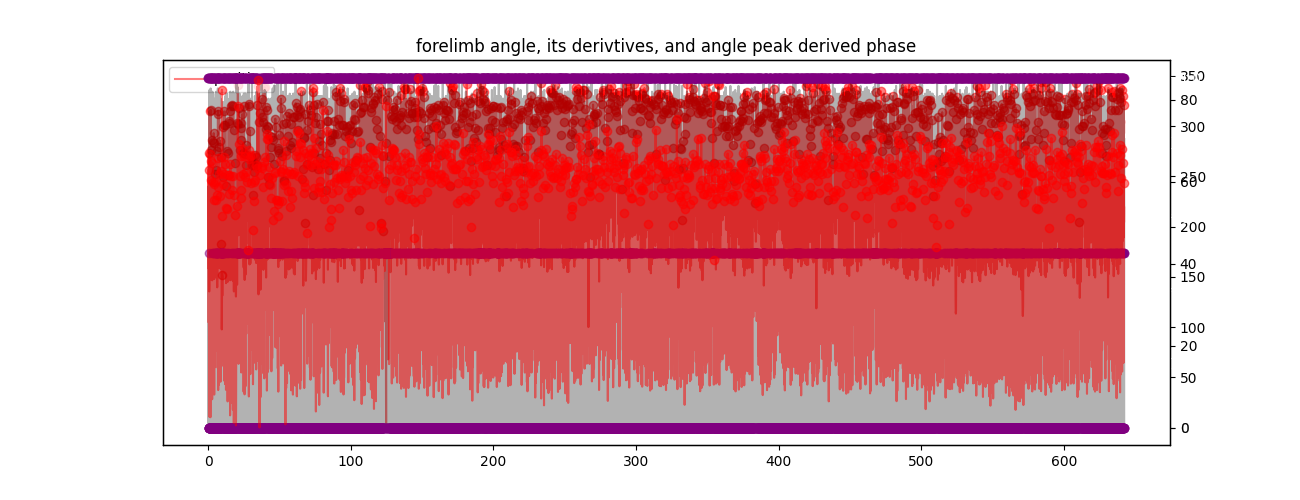

In [178]:
fig4, (ax2) = plt.subplots(1, 1, figsize=(13,5),sharex = True)
 
# ax00 = ax0.twinx()    
# ax000 = ax0.twinx()    
# ax0000 = ax0.twinx()    
# ax00000 = ax0.twinx()    
# ax000.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
# ax0.plot(tsf, rel_x, c = 'r', alpha = 0.5, label= 'position')
# ax0.scatter(tsf[peaks_relx], rel_x[peaks_relx], c = 'r', alpha = 0.5)

# ax0000.scatter(tsf, bdxdt, c = 'b', alpha = 0.5, label = 'velocity')

# # ax00.plot(tsf[:-1], dxdt, c = 'b', alpha = 0.5, label = 'velocity')


ax0.legend(loc='upper left')
# ax00.legend(loc='upper right')
ax0.tick_params(axis='y', colors='white')
ax00.tick_params(axis='y', colors='white')
ax0000.tick_params(axis='y', colors='white')
ax00000.tick_params(axis='y', colors='white')
ax0.set_title("")

ax22 = ax2.twinx()    
ax222 = ax2.twinx()    
ax2222 = ax2.twinx()    
ax22222 = ax2.twinx()    
ax222.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
ax2.plot(tsf, fore_angle, c = 'r', alpha = 0.5, label= 'position')
ax2.scatter(tsf[peaks_theta], fore_angle[peaks_theta], c = 'r', alpha = 0.5)
ax22222.plot(tsf, rel_x, c = 'r', alpha = 0.5, label= 'position')
ax22222.scatter(tsf[peaks_relx], rel_x[peaks_relx], c = 'r', alpha = 0.5)

# ax2222.scatter(tsf, bdtdt, c = 'b', alpha = 0.5, label = 'velocity')
ax2222.scatter(tsf, meandt, c = 'purple', alpha = 0.5, label = 'velocity')

# ax22.plot(tsf[:-1], dthetadt, c = 'b', alpha = 0.5, label = 'velocity')

ax2.legend(loc='upper left')
# ax22.legend(loc='upper right')
# ax222.legend(loc='lower right')
ax2.tick_params(axis='y', colors='white')
ax22.tick_params(axis='y', colors='white')
ax2222.tick_params(axis='y', colors='white')
ax2.set_title("forelimb angle, its derivtives, and angle peak derived phase")

In [120]:
print(bdxdt[-0])
print(bdxdt.shape[0])

1.0
12847
